In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys

sys.path.insert(0, "/Users/ianmacmoore/Desktop/ClassHomework/keys")

In [3]:
pop_byCounty_df = pd.read_csv("./Output_Data/Census_County_Population_20200420.csv")
pop_byCounty_df


,Population,County,State
0,47086.0,Washington,Mississippi
1,12028.0,Perry,Mississippi
2,8321.0,Choctaw,Mississippi
3,23480.0,Itawamba,Mississippi
4,10129.0,Carroll,Mississippi
...,...,...,...
3215,17672.0,Clayton,Iowa
3216,20260.0,Buena Vista,Iowa
3217,10674.0,Guthrie,Iowa
3218,9566.0,Humboldt,Iowa


In [4]:
#Get MN Counties of interest
pop_TwinCities = pop_byCounty_df.loc[(pop_byCounty_df['State']=="Minnesota")&(pop_byCounty_df['County']=="Hennepin")|(
    pop_byCounty_df['County']=="Ramsey"),:]
pop_TwinCities
#Don't know why this is still giving Ramsey Co ND




,Population,County,State
552,1235478.0,Hennepin,Minnesota
2351,541493.0,Ramsey,Minnesota
2857,11557.0,Ramsey,North Dakota


In [5]:
pop_TwinCities.drop(axis=0,index=2857)
pop_TwinCities

,Population,County,State
552,1235478.0,Hennepin,Minnesota
2351,541493.0,Ramsey,Minnesota
2857,11557.0,Ramsey,North Dakota


In [6]:
pop_TwinCities = pop_TwinCities.loc[pop_TwinCities['State']=="Minnesota"]
pop_TwinCities

,Population,County,State
552,1235478.0,Hennepin,Minnesota
2351,541493.0,Ramsey,Minnesota


In [7]:
pop_TwinCities.sum()

Population           1.77697e+06
County            HennepinRamsey
State         MinnesotaMinnesota
dtype: object

In [8]:
pd.to_numeric(pop_byCounty_df['Population'])

pop_PotentialComparisons = pop_byCounty_df.loc[(
    pop_byCounty_df['Population']>1000000)&(
    pop_byCounty_df['Population']<2000000),:]




In [32]:
pop_PotentialComparisons.sort_values('Population', axis=0, inplace=True)
pop_PotentialComparisons.reset_index(inplace=True)
pop_PotentialComparisons

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Population,County,State
0,2522,1019722.0,Pima,Arizona
1,3106,1021902.0,Fulton,Georgia
2,1743,1040133.0,Montgomery,Maryland
3,402,1046558.0,Wake,North Carolina
4,369,1054314.0,Mecklenburg,North Carolina
5,640,1120805.0,Salt Lake,Utah
6,1857,1133247.0,Contra Costa,California
7,672,1143529.0,Fairfax,Virginia
8,2694,1203166.0,Travis,Texas
9,1182,1225561.0,Allegheny,Pennsylvania


In [33]:
#Do it again for States
pop_byState_df = pd.read_csv("./Output_Data/Census_State_Population_20200420.csv")
pop_byState_df

,State,Population
0,Minnesota,5527358.0
1,Mississippi,2988762.0
2,Missouri,6090062.0
3,Montana,1041732.0
4,Nebraska,1904760.0
5,Nevada,2922849.0
6,New Hampshire,1343622.0
7,New Jersey,8881845.0
8,New Mexico,2092434.0
9,New York,19618453.0


In [35]:
pop_PotentialComparisonsSt = pop_byState_df.loc[(
    pop_byState_df['Population']>5000000)&(
    pop_byState_df['Population']<6000000)]
pop_PotentialComparisonsSt

,State,Population
0,Minnesota,5527358.0
26,Wisconsin,5778394.0
34,Colorado,5531141.0


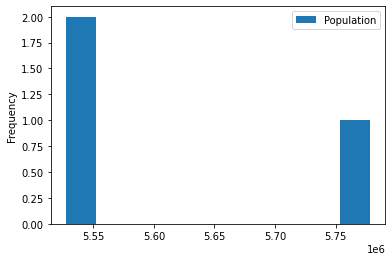

In [44]:
#Hennepin, MN	27053	0	606.43 sq mi
#Ramsey, MN	27123	0	170.16
#Wayne, MI	26163	0	672.26
#MINNESOTA	27000	0	86942.71
#MICHIGAN	26000	0	96810.22
#WISCONSIN	55000	0	65503.21
#COLORADO	08000	0	104100.32

pop_PotentialComparisonsSt.plot(kind='hist', x="State", y="Population")

In [70]:
#numbers = [1, 2, 3, 4, 5, 6, 18, 20]
#squares = ["small" if number < 10 else "big" for number in numbers if number % 2 == 0 if number % 3 == 0]
#print(squares)

stateAbbrev = pd.read_excel("./WorkingFiles/StateAbbreviation.xlsx")
stateAbbrev.set_index('State', inplace=True)
stateAbbrevDict = stateAbbrev.to_dict()

pop_byCounty_df['State Abbreviation'] = ""

for row in pop_byCounty_df['State']:
    if row==stateAbbrevDict['State Abbreviation']:
        pop_byCounty_df['State Abbreviation'][row] = stateAbbrevDict['State Abbreviation'][row]

pop_byCounty_df

,Population,County,State,State Abbreviation
0,47086.0,Washington,Mississippi,
1,12028.0,Perry,Mississippi,
2,8321.0,Choctaw,Mississippi,
3,23480.0,Itawamba,Mississippi,
4,10129.0,Carroll,Mississippi,
...,...,...,...,...
3215,17672.0,Clayton,Iowa,
3216,20260.0,Buena Vista,Iowa,
3217,10674.0,Guthrie,Iowa,
3218,9566.0,Humboldt,Iowa,
